In [21]:
# README:
"""
Beginnings of a more sophisticated detection 
algorithm. Uses a modified version of cross 
correlation script. 
"""

from scipy import signal

# more sophisticated click detection method
def find_clicks(arr, template):
    
    # 1) cross corelate with wavefile using Ernst's script 
    #correlation = scipy.correlate(arr, template)
    correlation = correlate(arr, template)
   
    # 2) find local maxima on graph (should find maximum's on the gradient instead)
    maxima = find_local_maxima(correlation)
    
    # 3) determine some threshold
    threshold = 0
    
    # 4) if maximum > threshold then add to starts array
    starts = np.array([])
    for i in maxima:
        if (i > threshold):
            starts = np.append(starts, np)

    # 5) return array of click starts (MIGHT HAVE TO ADJUST MAXIMUM, OR NOT LOOK FOR MAXIMUM?)
    return starts
    
# returns local maxima in an array
def find_local_max(arr):
    maxima = np.array([])
    for i in range(1, len(arr) - 1):
        x = arr[i]
        if ((x > arr[i - 1]) and (x > arr[i + 1])):
            maxima = np.append(maxima, x)
    return maxima


In [22]:
a = np.array([1,2,3,4,3,5,2,1])
print(find_local_max(a))

[4. 5.]


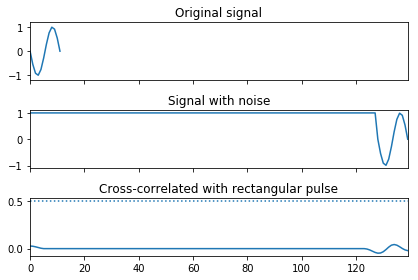

In [8]:
# playing around with scipy signl package

from scipy import signal
in_array = np.linspace(-np.pi, np.pi, 12) 
sig = np.sin(in_array) 
sig_noise = np.concatenate((np.ones(128), sig))
corr = signal.correlate(sig_noise, sig, mode='same') / 128


import matplotlib.pyplot as plt
clock = np.arange(64, len(sig), 128)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
fig.show()

In [26]:
# Ernst's code

import matplotlib.pyplot as plt
import numpy as np
import numpy.fft as fft
from scipy import signal
from scipy.signal import butter, lfilter

def PSD_using_scipy(ampl, fs):
    return signal.welch(ampl, fs, nperseg=1024, scaling= 'spectrum')

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut/nyq
    high = highcut/nyq
    print(low, high)
    b, a = butter(order, [low, high], btype='band', analog=False)
    return b, a

#def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
#    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
#    y = lfilter(b, a, data)
#    return y

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    y = butter_lowpass_filter(data, highcut, fs, order)
    return butter_highpass_filter(y, lowcut, fs, order)

def PSD_using_numpy(ampl, fs):
    spectrum = fft.fft(ampl)
    PSD = np.abs(spectrum)**2 * (2./(fs*len(spectrum)))
    freq = fft.fftfreq(len(spectrum),d=1./fs)
    return freq, PSD

def correlate(data, template):
    Fs = 144000
    
    #template = np.loadtxt('template_click.dat')
    #data = np.loadtxt('sample-data2.txt')
    sig_noise = butter_highpass_filter(data, 1000 , Fs, 5) # filters out long wavelength features, ie. processed version of signal+noise
    
    fir_coefficients = template[:-1]
    #fir_coefficients = template[1250:1200:-1]
    det = signal.lfilter(fir_coefficients, 1, sig_noise) # det is the correlation vector

    f, det_spec = PSD_using_scipy(det*det, 1)
    
    plt.subplot(311)
    plt.plot(sig_noise)
    plt.subplot(312)
    plt.plot(det*det)
    plt.subplot(313)
    plt.plot(f, det_spec, 'o-')
    plt.xlim([0,0.1])
    
    return det

#    plt.hist(det, 50)
    #plt.show()
    
    

#import sys
#if __name__ == "__main__":
#   sys.exit(main())

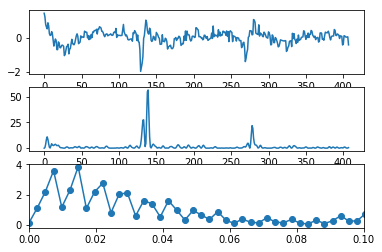

In [59]:
# playing around with scipy signl package
import scipy as sp
from scipy import signal

in_array = np.linspace(-np.pi, np.pi, 12) 
sig = np.sin(in_array) 
sig_noise = np.concatenate((np.ones(128), sig, np.ones(128), sig * .5, np.ones(128)))
sig_noise += np.random.random(sig_noise.shape)
sig_noise = sp.signal.medfilt(sig_noise)
det = correlate(sig_noise, sig)


127
134
135
136
137
138
139


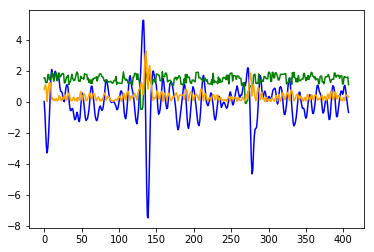

In [79]:
# more playing around with correlate script

plt.plot(det, color = 'blue')
plt.plot(sig_noise, color = 'green')
plt.plot(np.abs(np.gradient(det)), color= 'orange')
#plt.plot(sig, color = 'orange')


dev = np.abs(np.gradient(det))
mean = np.mean(dev)
std = np.std(dev)

for i in range(dev.shape[0] - 11):
    pos = True
    for j in range(5):
        if (dev[i + j] <= (mean + std)):
            pos = False
    if (pos):
        print(i)
        
